# Задача Т5

In [51]:
import numpy as np
import matplotlib.pyplot as plt

### Параметры задачи

In [84]:
n = 100
theta = 5
beta = 0.95

### Генерируем выборку

In [85]:
# разыгрываем случайную равномерно распределенную на [0,1] величину 
s = np.random.uniform(0,1,n)


def inverse_f(x):
    return (1 - x)**(1 / (1-theta))

sample = [inverse_f(i) for i in s]
print(sample)

[1.1763211667835909, 1.04941902283234, 1.2249819440181597, 1.003217521065965, 1.1145700532007619, 1.0330040343920208, 1.2648817369958105, 1.0814628364446108, 2.2346868953116337, 1.3059564141041793, 1.0056375486231193, 1.2221049223859546, 1.2184215065514195, 1.2787941207531988, 1.0655106915454844, 2.328588548383462, 1.1839949657151423, 1.0842323993507939, 1.1997861287124463, 1.2095695915925049, 2.0221069844414603, 1.1702374554614148, 1.2239840363592316, 1.803890213819729, 1.2575015609859446, 1.5187779290044585, 1.1457106799323096, 1.1744774265694142, 1.115125961994659, 1.1668575021345524, 1.35750990615776, 1.1386826316119292, 1.2822390697012378, 1.1918433385394864, 1.0859393196818092, 1.254608459491699, 1.238392064150629, 1.3915573451678602, 1.932229142539752, 2.0590354055244666, 1.707794128394752, 1.8558096217090425, 1.0371531399555594, 1.3205151749735269, 1.718827870414276, 1.119070943776751, 1.292565936626931, 1.0975684919225976, 1.0612706544264439, 1.2343022765725136, 1.003437016309

### Доверительный интервал по ОМП

In [86]:
theta_est = n / (np.sum(np.log(sample))) + 1
print(f'оценка тета по ОМП: {theta_est}')

оценка тета по ОМП: 5.107440256125586


In [87]:
f1_omm =  (1.96*(theta_est-1)/n**0.5) + theta_est
f2_omm = - (1.96*(theta_est-1)/n**0.5) + theta_est
print(f2_omm, " < \u03F4 < ", f1_omm)

4.302381965924972  < ϴ <  5.9124985463262005


### Bootstrap (непараметрический) - используем только выборку

In [89]:
# делаем 1000 подвыборок объема n с возвращениями по исходной выборке

N = 1000

deltas = []

for i in range(N):
    # генерируем массив индексов
    tmp_sample = []
    sample_indeces = np.random.randint(0, n, n);
    
    for j in range(n):
        tmp_sample.append(sample[sample_indeces[j]])
    
    tmp_theta = n / (np.sum(np.log(tmp_sample))) + 1
    deltas.append(tmp_theta - theta_est)

# вариационный ряд из дельт
deltas.sort()
    
# квантили
k1 = int((1/2 - beta/2) * N)
k2 = int((1/2 + beta/2) * N)

f1_bootstrap = theta_est - deltas[k1 - 1]
f2_bootstrap = theta_est - deltas[k2 - 1]

print(f2_bootstrap, " < \u03F4 < ", f1_bootstrap)


4.153135516682557  < ϴ <  5.824173623918963


### Bootstrap (параметрический) - используем модель

In [96]:
# делаем 50000 подвыборок объема n по вероятностой модели
N = 50000

theta_est = n/np.sum(np.log(sample)) + 1
param_deltas = []

for i in range(N):
    s = np.random.uniform(0,1,n)
    tmp_sample = [inverse_f(i) for i in s]
    
    tmp_theta_est = n/np.sum(np.log(tmp_sample)) + 1
    param_deltas.append(tmp_theta_est - theta_est)

# вариационный ряд из дельт
param_deltas.sort()

# квантили
k1 = int((1/2 - beta/2) * N)
k2 = int((1/2 + beta/2) * N)

f1_pb = theta_est - param_deltas[k1 - 1]
f2_pb = theta_est - param_deltas[k2 - 1]

print(f2_pb, " < \u03F4 < ", f1_pb)

4.300789407150378  < ϴ <  5.897233435559383


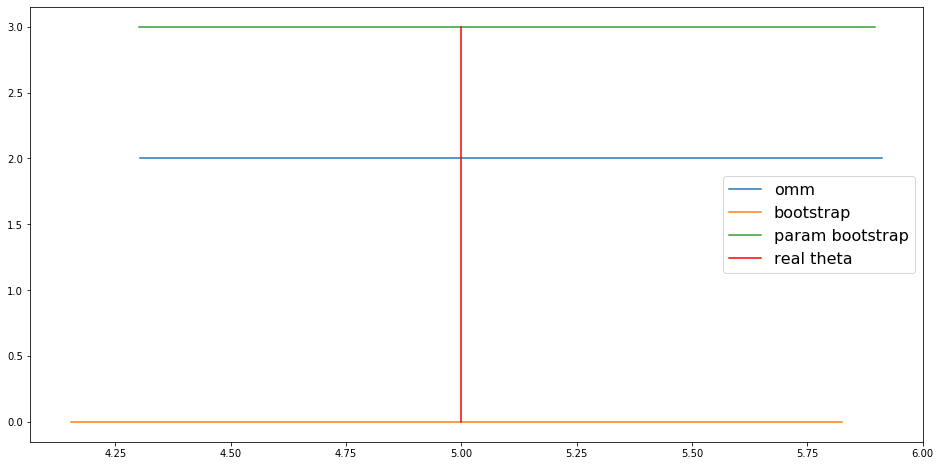

In [97]:
plt.figure(figsize=(16, 8))

plt.plot([f1_omm, f2_omm], [2, 2], label = "omm")
plt.plot([f1_bootstrap, f2_bootstrap], [0, 0], label = "bootstrap")
plt.plot([f1_pb, f2_pb], [3, 3], label = "param bootstrap")
plt.plot([theta, theta], [0, 3], color = "red", label = "real theta")

plt.legend(prop={'size': 16})
plt.show()